In [11]:
from ktools.utils.load_dataframes import load_all_dataframes
from ktools.modelling.ensemble.ridge_regression_blending_ensemble import RidgeRegressionBlendingEnsemble

In [12]:
oofs = load_all_dataframes("./data/diabetes_prediction/oofs/")
test_preds = load_all_dataframes("./data/diabetes_prediction/test_preds/")

In [13]:
import pandas as pd
from sklearn.metrics import roc_auc_score


def plot_test_dist_performance_against_nontest(oofs: pd.DataFrame, test_preds: pd.DataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error

    auc_tests = []
    auc_trains = []

    for model_name in test_preds.columns:

        true_labels_test = oofs.loc[oofs["data"] == 0, 'diagnosed_diabetes']
        true_labels_train = oofs.loc[oofs["data"] == 1, 'diagnosed_diabetes']

        oof_preds_train = oofs.loc[oofs["data"] == 1, model_name]
        oof_preds_test = oofs.loc[oofs["data"] == 0, model_name]

        auc_test = roc_auc_score(true_labels_test, oof_preds_test)
        # print(f'ROC AUC Score for {model_name}: {auc_test:.4f}')
        auc_train = roc_auc_score(true_labels_train, oof_preds_train)
        # print(f'ROC AUC Score for {model_name}: {auc_train:.4f}')

        auc_tests.append(auc_test)
        auc_trains.append(auc_train)

    plt.figure(figsize=(12, 6))
    plt.scatter(auc_trains, auc_tests)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Train-like OOF ROC AUC')
    plt.ylabel('Test-like OOF ROC AUC')
    plt.title('Train vs Test ROC AUC Scores')
    plt.grid()
    plt.show()

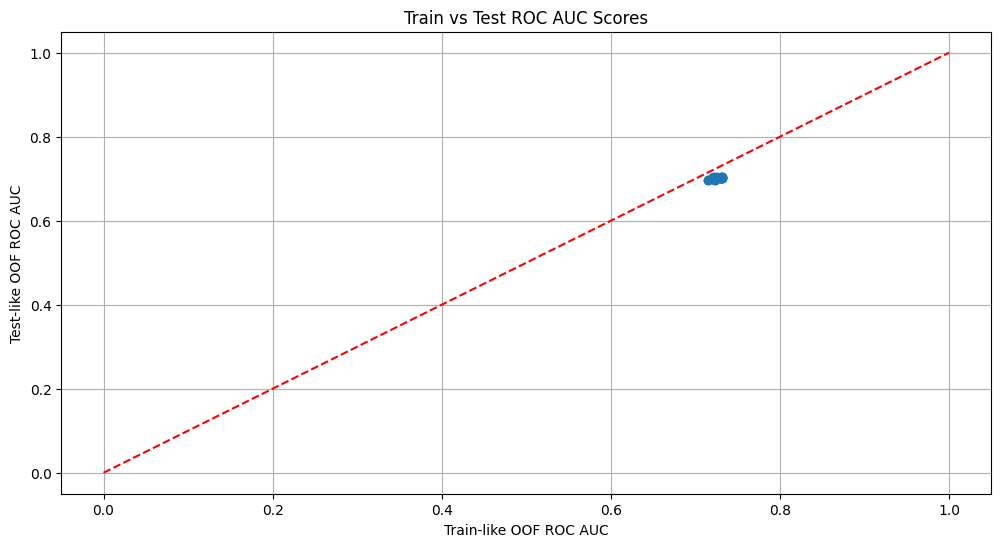

In [14]:
plot_test_dist_performance_against_nontest(oofs, test_preds)

In [5]:
oofs = oofs[oofs["data"] == 0]

In [6]:
# oofs.drop(columns=[f for f in oofs.columns if f.endswith("BAG_L1")], inplace=True)
# test_preds.drop(columns=[f for f in test_preds.columns if f.endswith("BAG_L1")], inplace=True)

In [7]:
for model in test_preds.columns:
    predictions = oofs[model]
    auc = roc_auc_score(oofs["diagnosed_diabetes"], predictions)
    print(f"{model}: ROC AUC = {auc:.4f}")

LightGBMXT_BAG_L1: ROC AUC = 0.7018
LightGBM_BAG_L1: ROC AUC = 0.7028
RandomForestGini_BAG_L1: ROC AUC = 0.6977
RandomForestEntr_BAG_L1: ROC AUC = 0.6980
CatBoost_BAG_L1: ROC AUC = 0.7028
ExtraTreesGini_BAG_L1: ROC AUC = 0.6970
ExtraTreesEntr_BAG_L1: ROC AUC = 0.6970
NeuralNetFastAI_BAG_L1: ROC AUC = 0.7021
XGBoost_BAG_L1: ROC AUC = 0.7012
NeuralNetTorch_BAG_L1: ROC AUC = 0.7011
LightGBMLarge_BAG_L1: ROC AUC = 0.7021
CatBoost_r177_BAG_L1: ROC AUC = 0.7023
NeuralNetTorch_r79_BAG_L1: ROC AUC = 0.7009
LightGBM_r131_BAG_L1: ROC AUC = 0.7025
NeuralNetFastAI_r191_BAG_L1: ROC AUC = 0.7004
CatBoost_r9_BAG_L1: ROC AUC = 0.7031
LightGBM_r96_BAG_L1: ROC AUC = 0.7040
NeuralNetTorch_r22_BAG_L1: ROC AUC = 0.7001
XGBoost_r33_BAG_L1: ROC AUC = 0.7009
CatBoost_r137_BAG_L1: ROC AUC = 0.7023
NeuralNetFastAI_r102_BAG_L1: ROC AUC = 0.6989
WeightedEnsemble_L2: ROC AUC = 0.7036
b31728ea-1174-4ed6-987a-7f0a65373bd8: ROC AUC = 0.7046
c6f267b2-ddc9-4d0f-85a4-c5ce5b54d693: ROC AUC = 0.7031
e66e4d41-1892-4f24-a5c

####################################################################################################
<function roc_auc_score at 0xffff3021ad40>  score of ridge blender:  0.7070959856334039
####################################################################################################


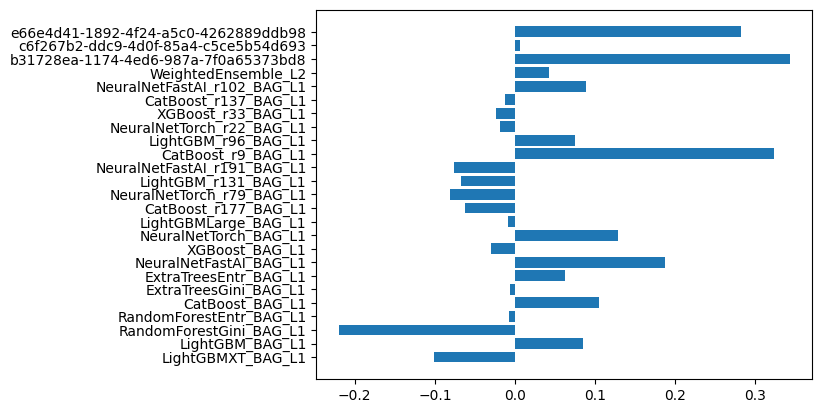

,predictor_name,score
0,RandomForestGini_BAG_L1,-0.219920
1,LightGBMXT_BAG_L1,-0.101677
2,NeuralNetTorch_r79_BAG_L1,-0.080736
3,NeuralNetFastAI_r191_BAG_L1,-0.075629
4,LightGBM_r131_BAG_L1,-0.067851
5,CatBoost_r177_BAG_L1,-0.061970
6,XGBoost_BAG_L1,-0.029688
7,XGBoost_r33_BAG_L1,-0.024059
8,NeuralNetTorch_r22_BAG_L1,-0.018469
9,CatBoost_r137_BAG_L1,-0.012516


In [8]:
from sklearn.metrics import roc_auc_score


ensemble = RidgeRegressionBlendingEnsemble(
    oof_dataframe=oofs[test_preds.columns],
    train_labels=oofs["diagnosed_diabetes"],
    metric=roc_auc_score,
)

ensemble.fit_weights()

In [9]:
final_test_preds = ensemble.predict(test_preds)

In [10]:
import pandas as pd
from datetime import datetime

sub_name = f"submissions/ridge_submission_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
sample_sub = pd.read_csv("data/diabetes_prediction/sample_submission.csv", index_col=0)
sample_sub["diagnosed_diabetes"] = final_test_preds
sample_sub.to_csv(sub_name)